# Flagship vs Pancan Comparison

This notebooks compares the mutation type abundance for EGFR between the flagship and harmonized pancan pipelines. 

# Part 1: EGFR mutation status

# Step 1: Flagship EGFR mutation status

Make a figure which shows the mutation type abundance for EGFR across the different cancers. 

First import cptac and load datasets

In [1]:
import cptac
cptac.version() 
import warnings
warnings.filterwarnings('ignore')

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plot_utils as p

In [3]:
en = cptac.Endometrial()
hn = cptac.Hnscc()
l = cptac.Luad()
o = cptac.Ovarian()
c = cptac.Ccrcc()
col = cptac.Colon()
g = cptac.Gbm()
b = cptac.Brca()
ls = cptac.Lscc()

Second, call get_geneotype_all_vars for EGFR for each cancer type. This returns a df with mutation, location, and mutation_status. For individuals with multiple mutations, we report a single mutation type based on the following priority: deletion, truncation, missense, amplification, inframe, silent, and wildtype.

In [4]:
endo = en.get_genotype_all_vars("EGFR")
gbm = g.get_genotype_all_vars("EGFR")
hnscc = hn.get_genotype_all_vars("EGFR")
ovar = o.get_genotype_all_vars("EGFR")
cc = c.get_genotype_all_vars("EGFR")
colon = col.get_genotype_all_vars("EGFR")
ld = l.get_genotype_all_vars("EGFR")
brca = b.get_genotype_all_vars("EGFR")
lscc = ls.get_genotype_all_vars("EGFR")

In [5]:
#example 
gbm.head()

Name,Mutation,Location,Mutation_Status
Patient_ID,,,
C3L-00104,Amplification,Amplification,Single_mutation
C3L-00365,Missense_Mutation,p.G665D,Multiple_mutation
C3L-00674,Amplification,Amplification,Single_mutation
C3L-00677,Amplification,Amplification,Single_mutation
C3L-01040,Amplification,Amplification,Single_mutation


# Step 2: Match Mutation Labels

Change labels to match desired final figure and have nameing be more consistent across cancer type.

In [6]:
# Simplify mutation names
dfs = [endo, gbm, hnscc, ovar, cc, colon, ld, brca, lscc, cc]
for df in dfs:
    df['Mutation'].where(df['Mutation'] != 'Missense_Mutation', 'Missense', inplace = True) # replaces when false
    df['Mutation'].where(df['Mutation'] != 'Wildtype_Tumor', 'Wildtype', inplace = True)
    df['Mutation'].where(df['Mutation'] != 'In_Frame_Del', 'Indel', inplace = True)
    df['Mutation'].where(df['Mutation'] != 'Nonsense_Mutation', 'Truncation', inplace = True)
    
# change colon labels to match other cancers. Nonsynonymous in this case is missense and nonframeshift insertion is Indel.
colon["Mutation"] = colon['Mutation'].replace(['nonsynonymous SNV'], 'Missense')
colon["Mutation"] = colon['Mutation'].replace(['nonframeshift insertion'], 'Indel')

In [7]:
#Drop Silent mutation type
indexNames = hnscc[ hnscc['Mutation'] == "Silent" ].index
hnscc.drop(indexNames , inplace=True)
indexNames = ld[ ld['Mutation'] == "Silent" ].index
ld.drop(indexNames , inplace=True)
indexNames = brca[ brca['Mutation'] == "Silent" ].index
brca.drop(indexNames , inplace=True)


# Step 3: Create figure

Put dfs into a list. Create list of names for figure legend. 
Call plot_mutations function.

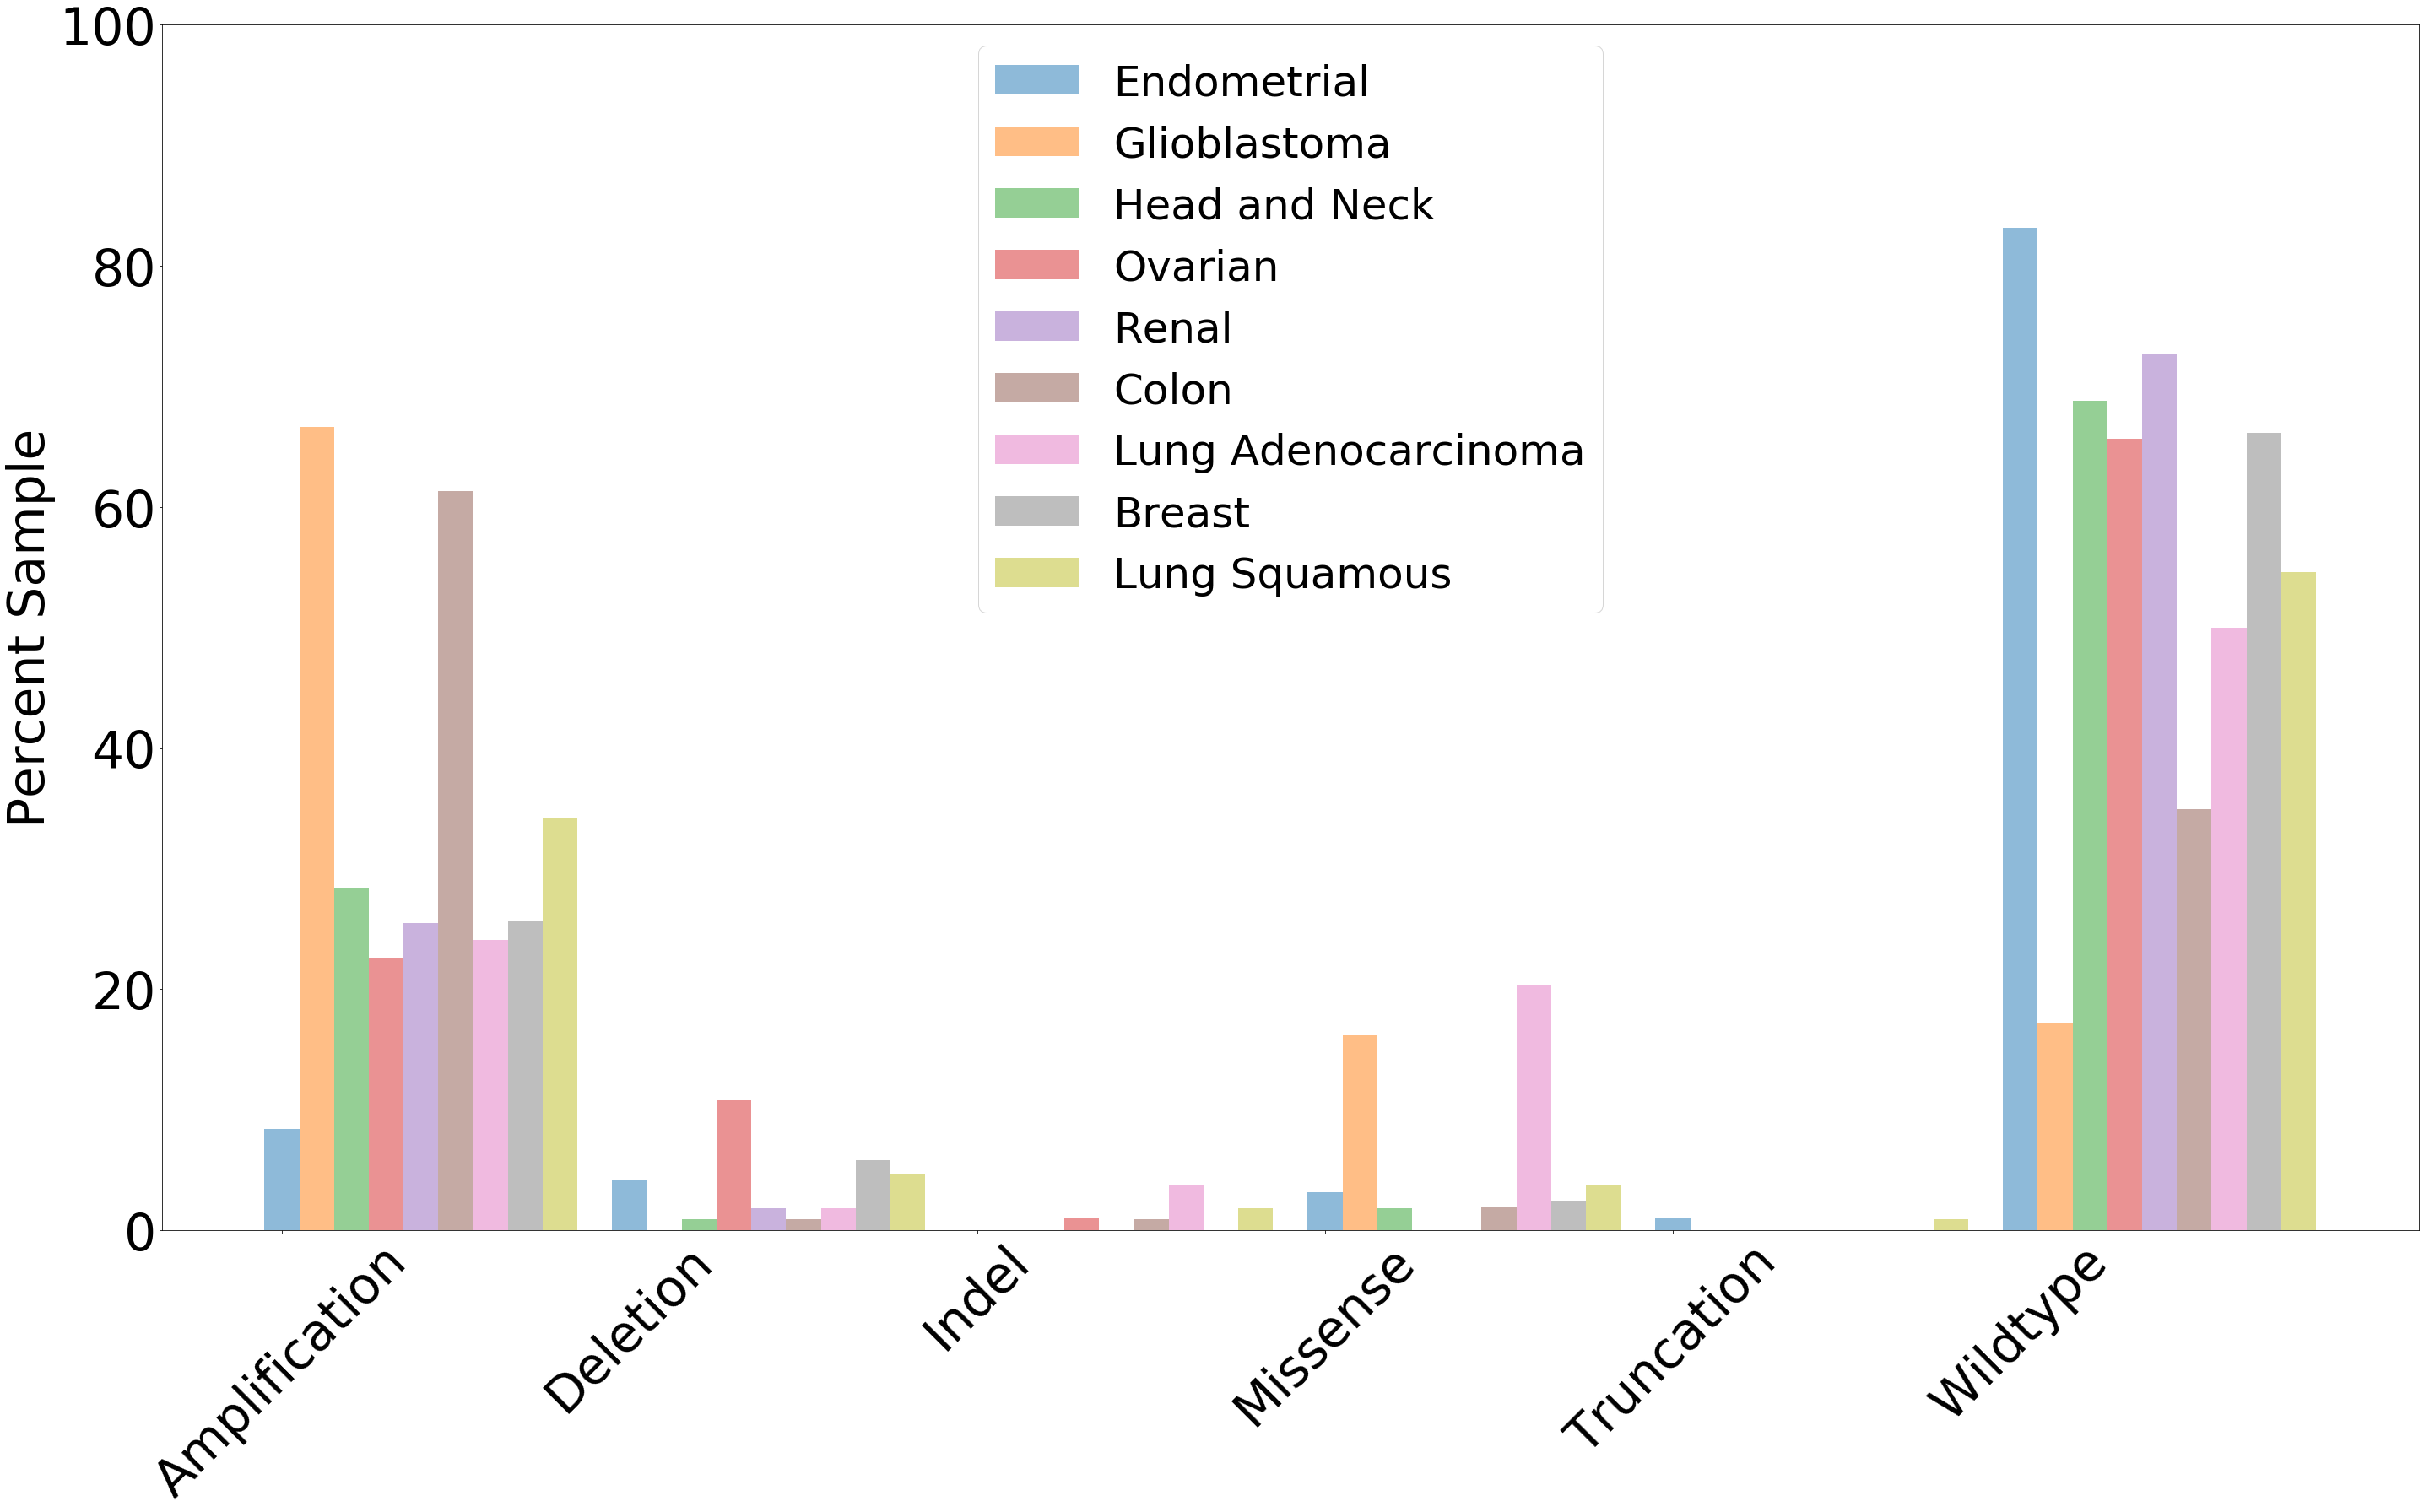

In [8]:
dfs = [endo, gbm, hnscc, ovar, cc, colon, ld, brca, lscc]
names = ['Endometrial', 'Glioblastoma', 'Head and Neck', 'Ovarian', 'Renal', 'Colon', 'Lung Adenocarcinoma', 'Breast',"Lung Squamous"]
p.figure1_plot_mutations(dfs, names,save_to_path = "png_files/Flagship_fig1.png")

# Step 4: Pancan EGFR mutation status

Repeat steps 1 - 3 using data from the pancan pipeline

load in pancan cptac data

In [9]:
import cptac.pancan as pc
pc_g = pc.PancanGbm()
pc_hn = pc.PancanHnscc()
pc_l = pc.PancanLuad()
#o = pc.PancanOv()
pc_c = pc.PancanCcrcc()
#col = pc.PancanCoad()
pc_b = pc.PancanBrca()
pc_ls = pc.PancanLscc()
pc_en = pc.PancanUcec()

Call get_geneotype_all_vars for EGFR for each cancer type. 

In [10]:
endo = pc_en.get_genotype_all_vars("EGFR", omics_source = "washu")
gbm = pc_g.get_genotype_all_vars("EGFR", omics_source = "washu")
hnscc = pc_hn.get_genotype_all_vars("EGFR", omics_source = "washu")
#ovar = o.get_genotype_all_vars("EGFR", omics_source = "washu")
cc = pc_c.get_genotype_all_vars("EGFR", omics_source = "washu")
#colon = col.get_genotype_all_vars("EGFR", omics_source = "washu")
ld = pc_l.get_genotype_all_vars("EGFR", omics_source = "washu")
brca = pc_b.get_genotype_all_vars("EGFR", omics_source = "washu")
lscc = pc_ls.get_genotype_all_vars("EGFR", omics_source = "washu")

In [11]:
#example 
gbm

Name,Mutation,Location,Mutation_Status
Patient_ID,,,
C3L-00104,Amplification,Amplification,Single_mutation
C3L-00365,Missense_Mutation,p.G665D,Multiple_mutation
C3L-00674,Amplification,Amplification,Single_mutation
C3L-00677,Amplification,Amplification,Single_mutation
C3L-01040,Amplification,Amplification,Single_mutation
...,...,...,...
C3N-03183,Missense_Mutation,p.P596L,Multiple_mutation
C3N-03184,Wildtype_Tumor,No_mutation,Wildtype_Tumor
C3N-03186,Amplification,Amplification,Single_mutation


# Step 5: Match Mutation Labels

Change labels to to match desired final figure.

In [12]:
# Simplify mutation names
dfs = [endo, gbm, hnscc, cc, ld, brca, lscc]
for df in dfs:
    df['Mutation'].where(df['Mutation'] != 'Missense_Mutation', 'Missense', inplace = True) # replaces when false
    df['Mutation'].where(df['Mutation'] != 'Wildtype_Tumor', 'Wildtype', inplace = True)
    df['Mutation'].where(df['Mutation'] != 'In_Frame_Del', 'Indel', inplace = True)
    df['Mutation'].where(df['Mutation'] != 'Nonsense_Mutation', 'Truncation', inplace = True)
    


In [13]:

#Drop Silent mutation type
indexNames = hnscc[ hnscc['Mutation'] == "Silent" ].index
hnscc.drop(indexNames , inplace=True)
indexNames = ld[ ld['Mutation'] == "Silent" ].index
ld.drop(indexNames , inplace=True)
indexNames = brca[ brca['Mutation'] == "Silent" ].index
brca.drop(indexNames , inplace=True)

#Drop Intron
indexNames = hnscc[ hnscc['Mutation'] == "Intron" ].index
hnscc.drop(indexNames , inplace=True)  

# Step 6: Create Figure 

Put dfs into a list. Create list of names for figure legend. 
Call plot_mutations function.

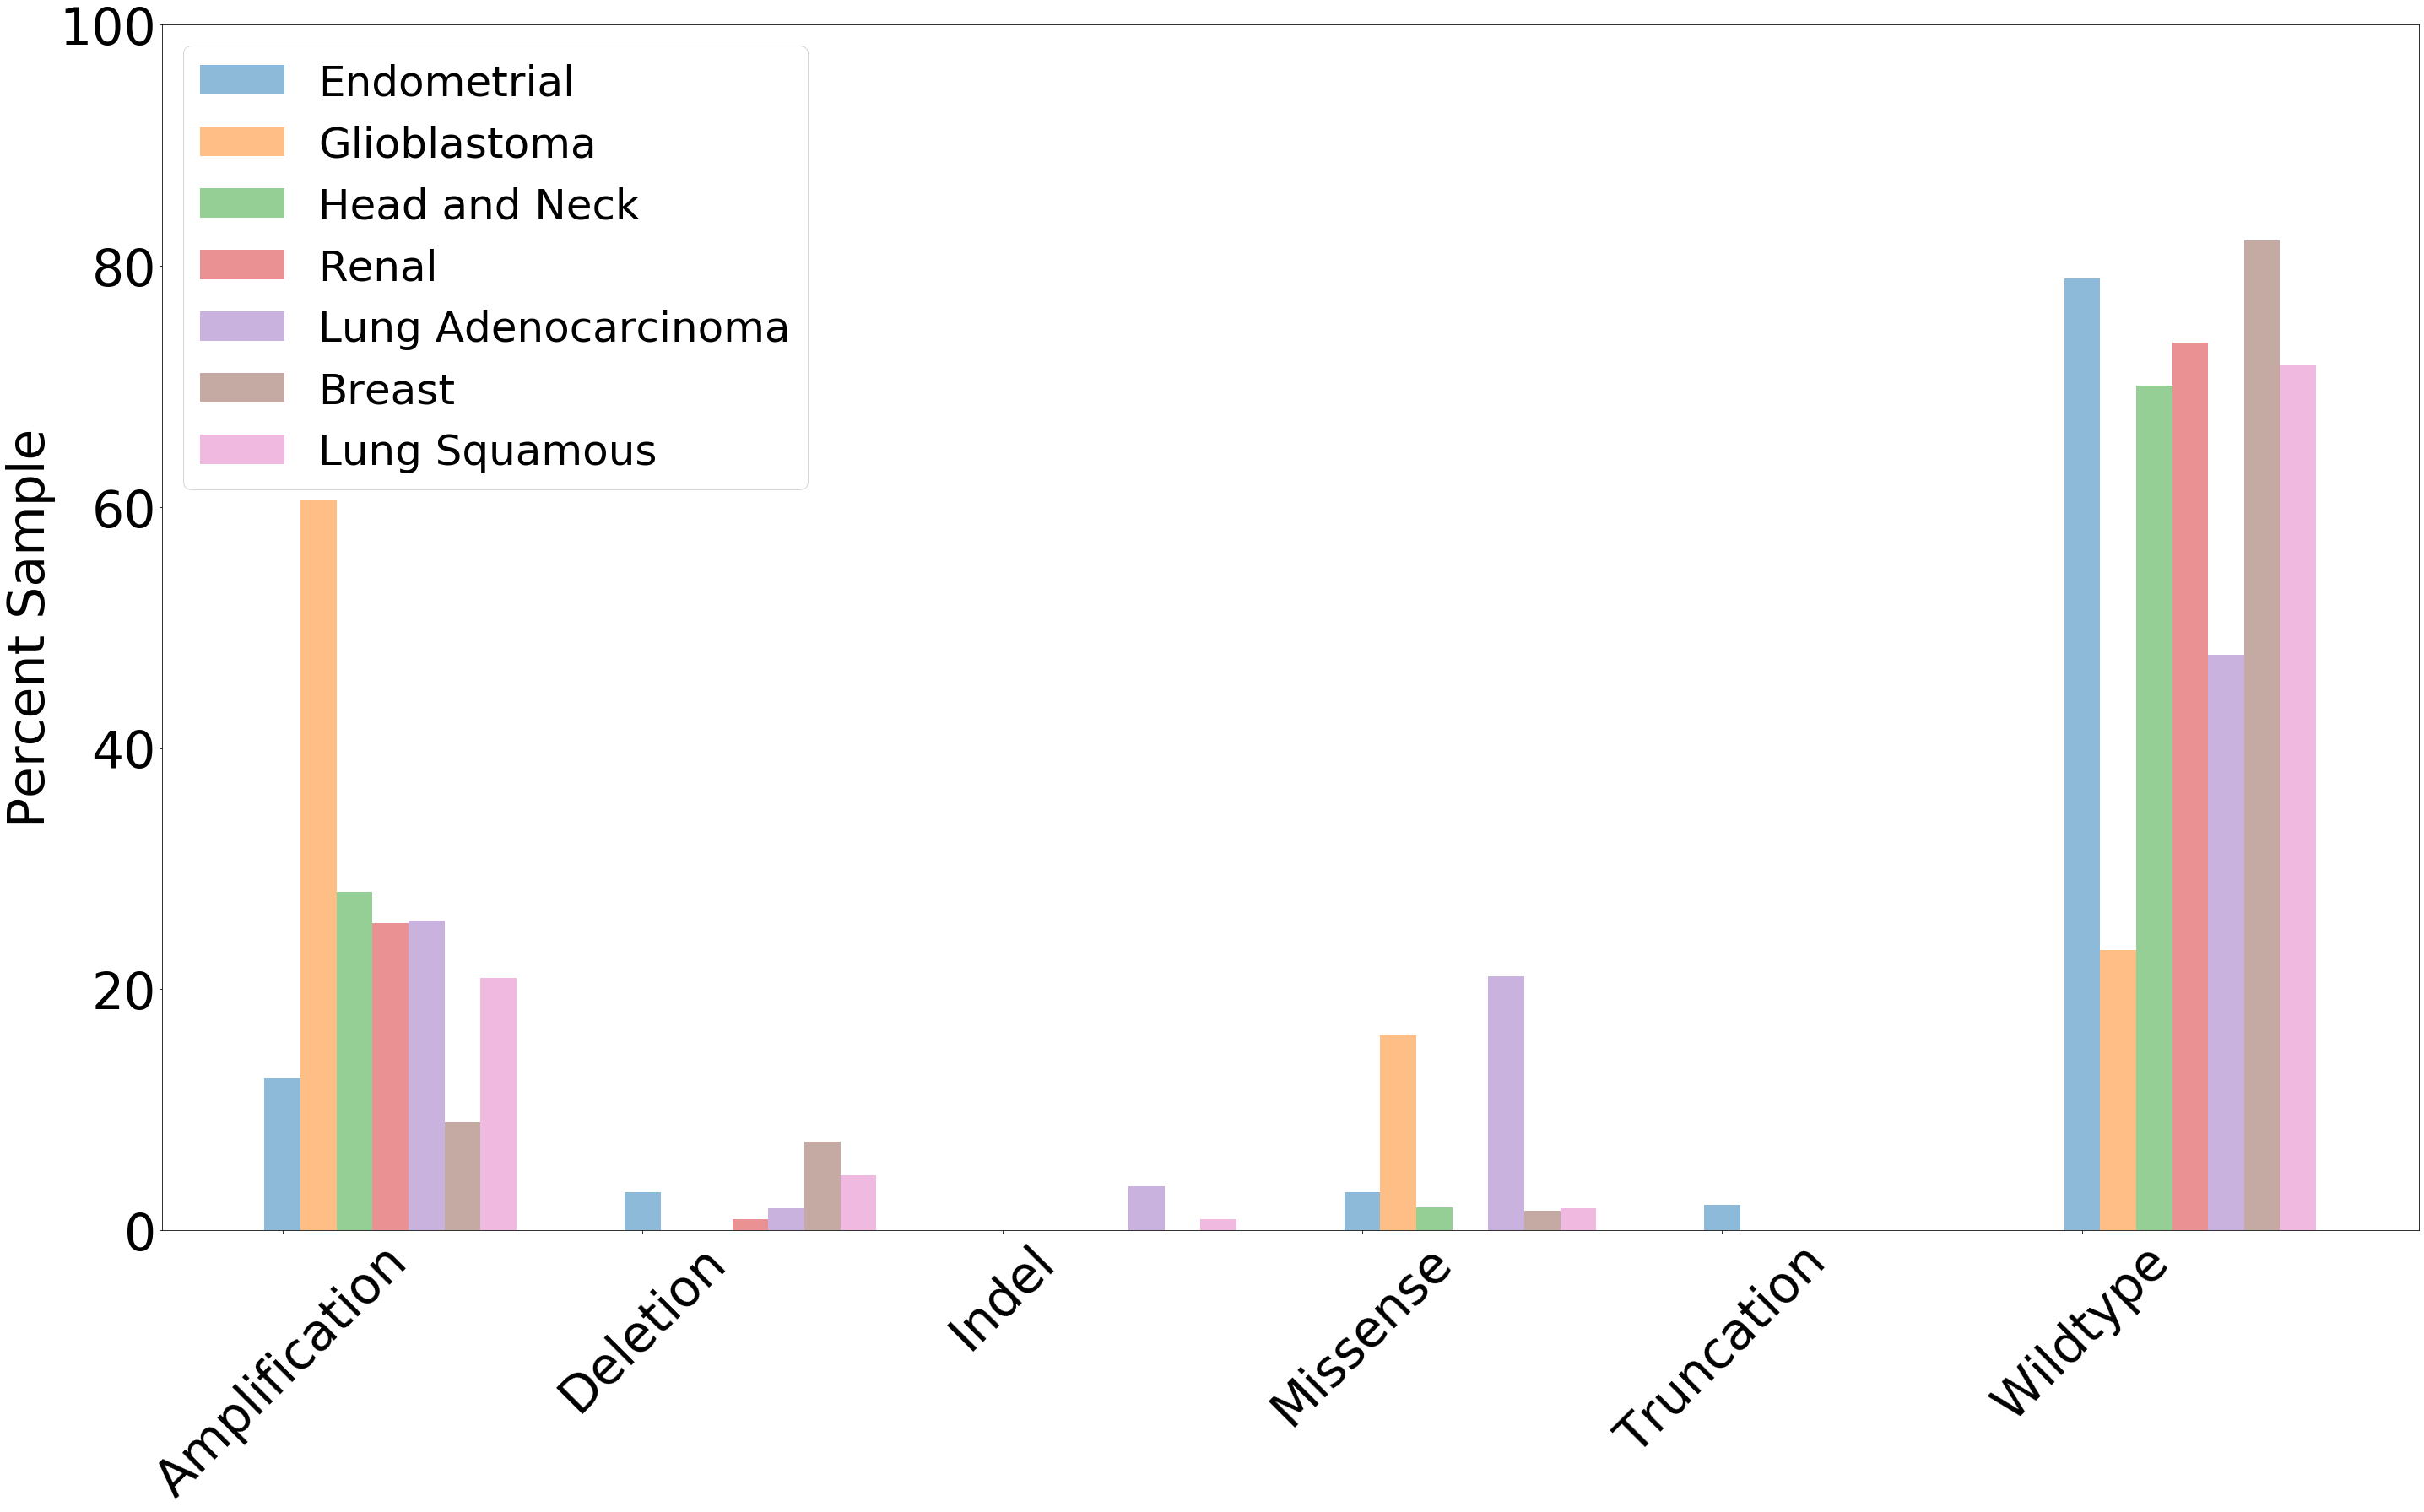

In [14]:
dfs = [endo, gbm, hnscc, cc, ld, brca, lscc]
names = ['Endometrial', 'Glioblastoma', 'Head and Neck', 'Renal', 'Lung Adenocarcinoma', 'Breast',"Lung Squamous"]
p.figure1_plot_mutations(dfs, names, save_to_path = "png_files/harmonized_fig1.png")